In [44]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from niipreprocess10 import  niipreprocess as npp
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.utils import resample
#from pandas_profiling import ProfileReport
import os
import glob
import warnings
warnings.filterwarnings("ignore")

In [64]:
import pandas as pd
import glob
files = glob.glob("C:/Users/c0028603/OneDrive - Sheffield Hallam University/05. Dissertation/BRaTS Dataset/BraTSReg_Training_Data_v2_csv/*.csv")

df = pd.DataFrame()
for index,f in enumerate(files):
    if index <=279:
        csv = pd.read_csv(f)
        df = pd.concat([df,csv])

In [65]:
#a = df.Z.unique()
#print(sorted(a))
print(df['istumor'].value_counts())
#df.to_csv('C:/Users/c0028603/OneDrive - Sheffield Hallam University/05. Dissertation/BRaTS Dataset/BraTSReg_Training_Data_v2_csv_Gigantic/BraTSReg_t1ce.nii.gz_values.csv' , index=False)

0    424891365
1         2504
Name: istumor, dtype: int64


In [66]:
b_dataset = df
#df1 = df[[df.query('istumor == 1')]]

In [67]:
#b_dataset.NiiFileName.unique()
b_dataset['istumor'].value_counts()


0    424891365
1         2504
Name: istumor, dtype: int64

In [49]:
#test_dataset['istumor'].value_counts().plot.bar()

#create two different dataframe of majority and minority class 
df_majority = b_dataset[(b_dataset['istumor']==0)] 
df_minority = b_dataset[(b_dataset['istumor']==1)] 
print(len(df_majority))
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples = 50000000,## len(df_majority), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

117124018


coutn of class 1    117124018
0    117124018
Name: istumor, dtype: int64


<AxesSubplot:>

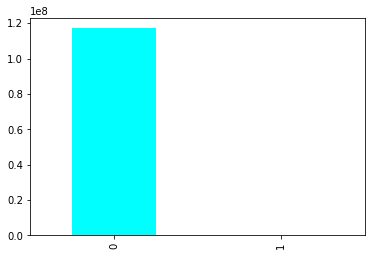

In [50]:
print("coutn of class {}".format(df_upsampled['istumor'].value_counts()))
b_dataset['istumor'].value_counts().plot.bar(color=['cyan','orange'])


<AxesSubplot:>

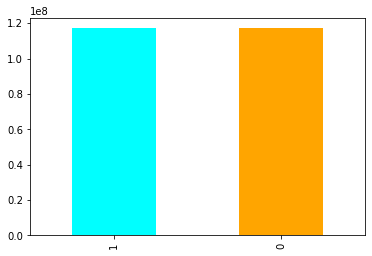

In [51]:
df_upsampled['istumor'].value_counts().plot.bar(color=['cyan','orange'])

In [52]:
test_dataset = pd.read_csv('C:/Users/c0028603/OneDrive - Sheffield Hallam University/05. Dissertation/BRaTS Dataset/BraTSReg_Training_Data_v2_csv/BraTSReg_005_00_0000_t1ce_values.csv')

In [53]:
X = df_upsampled[['X','pY','VoxVal','Z']]
y = df_upsampled[['istumor']]

In [54]:
X_test = test_dataset[['X','pY','VoxVal','Z']]
y_test = test_dataset[['istumor']]

In [55]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(4,),kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(8,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(1,kernel_initializer = 'uniform', activation='sigmoid'))

In [56]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
print(len(test_dataset))

1639781


Epoch 1/25
375/375 [==============================] - 46s 78ms/step - loss: 0.3357 - accuracy: 0.8453 - val_loss: 0.4765 - val_accuracy: 0.8315
Epoch 2/25
375/375 [==============================] - 37s 81ms/step - loss: 0.3263 - accuracy: 0.8525 - val_loss: 0.4838 - val_accuracy: 0.8352
Epoch 3/25
375/375 [==============================] - 35s 76ms/step - loss: 0.3190 - accuracy: 0.8586 - val_loss: 0.4741 - val_accuracy: 0.8460
Epoch 4/25
375/375 [==============================] - 35s 77ms/step - loss: 0.3144 - accuracy: 0.8652 - val_loss: 0.4544 - val_accuracy: 0.8575
Epoch 5/25
375/375 [==============================] - 34s 75ms/step - loss: 0.3119 - accuracy: 0.8670 - val_loss: 0.4357 - val_accuracy: 0.8676
Epoch 6/25
375/375 [==============================] - 37s 83ms/step - loss: 0.3103 - accuracy: 0.8670 - val_loss: 0.4363 - val_accuracy: 0.8696
Epoch 7/25
375/375 [==============================] - 36s 80ms/step - loss: 0.3092 - accuracy: 0.8675 - val_loss: 0.4714 - val_accuracy:

424891365
coutn of class 0    424891365
1     50000000
Name: istumor, dtype: int64
Epoch 1/25
760/760 [==============================] - 392s 381ms/step - loss: 0.3848 - accuracy: 0.8684 - val_loss: 0.2648 - val_accuracy: 0.9719
Epoch 2/25
760/760 [==============================] - 58s 76ms/step - loss: 0.3613 - accuracy: 0.8736 - val_loss: 0.2604 - val_accuracy: 0.9745
Epoch 3/25
760/760 [==============================] - 57s 76ms/step - loss: 0.3427 - accuracy: 0.8748 - val_loss: 0.2542 - val_accuracy: 0.9648
Epoch 4/25
760/760 [==============================] - 66s 78ms/step - loss: 0.3392 - accuracy: 0.8748 - val_loss: 0.2576 - val_accuracy: 0.9637
Epoch 5/25
760/760 [==============================] - 73s 83ms/step - loss: 0.3392 - accuracy: 0.8748 - val_loss: 0.2433 - val_accuracy: 0.9709
Epoch 6/25
760/760 [==============================] - 65s 73ms/step - loss: 0.3391 - accuracy: 0.8748 - val_loss: 0.2544 - val_accuracy: 0.9654
Epoch 7/25
760/760 [==============================]

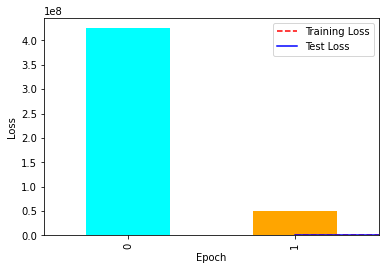

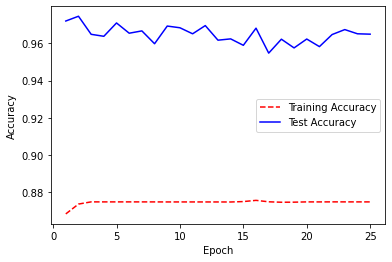

18996/18996 [==============================] - 107s 3ms/step - loss: 0.3112 - accuracy: 0.8927
Accuracy: 89.27
68/68 [==============================] - 5s 7ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1686825
           1       0.00      0.38      0.00         8

    accuracy                           0.98   1686833
   macro avg       0.50      0.68      0.50   1686833
weighted avg       1.00      0.98      0.99   1686833

[[1656616   30209]
 [      5       3]]


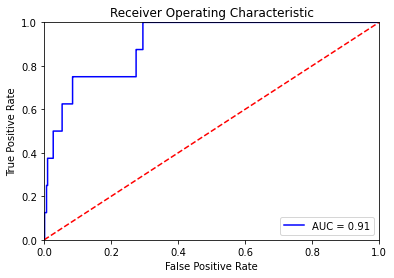

In [68]:
#test_dataset['istumor'].value_counts().plot.bar()

#----------------
#create two different dataframe of majority and minority class 
df_majority = b_dataset[(b_dataset['istumor']==0)] 
df_minority = b_dataset[(b_dataset['istumor']==1)] 
print(len(df_majority))
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples = 50000000,## len(df_majority), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
#--------------
print("coutn of class {}".format(df_upsampled['istumor'].value_counts()))
b_dataset['istumor'].value_counts().plot.bar(color=['cyan','orange'])
#----------------------
#class balancing plot
df_upsampled['istumor'].value_counts().plot.bar(color=['cyan','orange'])
#----------------
test_dataset = pd.read_csv('C:/Users/c0028603/OneDrive - Sheffield Hallam University/05. Dissertation/BRaTS Dataset/BraTSReg_Validation_Data_csv/BraTSReg_143_01_0102_t1ce_values.csv')
#-----------------------
X = df_upsampled[['X','pY','VoxVal','Z']]
y = df_upsampled[['istumor']]

X_test = test_dataset[['X','pY','VoxVal','Z']]
y_test = test_dataset[['istumor']]

#------------------
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(4,),kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(8,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(1,kernel_initializer = 'uniform', activation='sigmoid'))
#--------------------
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#------------------
# fit the keras model on the dataset
epoch_history = model.fit(X, y, epochs=25, batch_size=500000,validation_split=0.2)
#---------------
#pickle the model run always with 
from keras.models import load_model

model.save('dlmlpt1ce_25pctalanced.h5')
#-----------------
#all the rest of the code at one place
# Get training and test loss histories
training_loss = epoch_history.history['loss']
test_loss = epoch_history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
# Get training and test accuracy histories
training_accuracy = epoch_history.history['accuracy']
test_accuracy = epoch_history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
# evaluate the keras model
_, accuracy = model.evaluate(X, y,batch_size = 25000)
print('Accuracy: %.2f' % (accuracy*100))

predictions = model.predict(X_test,batch_size = 25000)
test_dataset['istumor_Pred'] = predictions






#precision 

print(classification_report(test_dataset['istumor'],test_dataset['istumor_Pred'].round()))
print(confusion_matrix(test_dataset['istumor'], test_dataset['istumor_Pred'].round()))

# calculate the fpr and tpr for all thresholds of the classification
y_true = test_dataset['istumor'] # ground truth labels
y_pred = test_dataset['istumor_Pred']# predicted probabilities generated by sklearn classifier
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

68/68 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1686825
           1       0.00      0.38      0.00         8

    accuracy                           0.98   1686833
   macro avg       0.50      0.68      0.50   1686833
weighted avg       1.00      0.98      0.99   1686833

[[1656616   30209]
 [      5       3]]


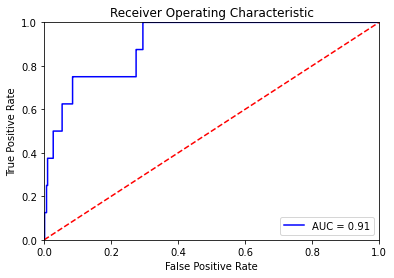

In [69]:
test_dataset = pd.read_csv('C:/Users/c0028603/OneDrive - Sheffield Hallam University/05. Dissertation/BRaTS Dataset/BraTSReg_Validation_Data_csv/BraTSReg_143_01_0102_t1ce_values.csv')

predictions = model.predict(test_dataset[['X','pY','VoxVal','Z']],batch_size = 25000)
test_dataset['istumor_Pred'] = predictions

#precision 

print(classification_report(test_dataset['istumor'],test_dataset['istumor_Pred'].round()))
print(confusion_matrix(test_dataset['istumor'], test_dataset['istumor_Pred'].round()))


# calculate the fpr and tpr for all thresholds of the classification
y_true = test_dataset['istumor'] # ground truth labels
y_pred = test_dataset['istumor_Pred']# predicted probabilities generated by sklearn classifier
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
test_dataset.query('istumor_Pred >= 0.999999 | istumor == 1').sort_values(['istumor'],ascending=False)

,Unnamed: 0,X,pY,VoxVal,Z,NiiFileName,LandmarksFileName,istumor,istumor_Pred
414174,31578,138,131,5355.856445,52,BraTSReg_143_01_0102_t1ce.nii.gz,BraTSReg_143_01_0102_landmarks.csv,1,0.624588
425998,23373,93,97,5279.800293,53,BraTSReg_143_01_0102_t1ce.nii.gz,BraTSReg_143_01_0102_landmarks.csv,1,0.799730
447361,31764,84,132,1663.246338,54,BraTSReg_143_01_0102_t1ce.nii.gz,BraTSReg_143_01_0102_landmarks.csv,1,0.245115
658428,21987,147,91,4184.147461,66,BraTSReg_143_01_0102_t1ce.nii.gz,BraTSReg_143_01_0102_landmarks.csv,1,0.572815
679863,26490,90,110,2564.860840,67,BraTSReg_143_01_0102_t1ce.nii.gz,BraTSReg_143_01_0102_landmarks.csv,1,0.385821
738714,27491,131,114,2401.337402,70,BraTSReg_143_01_0102_t1ce.nii.gz,BraTSReg_143_01_0102_landmarks.csv,1,0.346488
818095,28924,124,120,3211.336182,74,BraTSReg_143_01_0102_t1ce.nii.gz,BraTSReg_143_01_0102_landmarks.csv,1,0.453437
894005,24375,135,101,2544.161133,78,BraTSReg_143_01_0102_t1ce.nii.gz,BraTSReg_143_01_0102_landmarks.csv,1,0.238379
